In [1]:
%load_ext autoreload
%load_ext autotime

time: 336 µs (started: 2024-03-25 15:32:09 -07:00)


In [2]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings('ignore')

time: 553 µs (started: 2024-03-25 15:32:09 -07:00)


In [3]:
import dask
import dask.dataframe as dd
import numpy as np
import pandas as pd
print('pandas', pd.__version__)
print('dask', dask.__version__)
print('numpy', np.__version__)

pandas 1.3.2
dask 2021.08.1
numpy 1.20.3
time: 4.16 s (started: 2024-03-25 15:32:09 -07:00)


In [4]:
!ls /p/gpfs1/iopp/wisio_logs/_checkpoints/recorder_lbann_jag_32

_hlm
_hlm_file_name_proc_name_time_range
_hlm_proc_name
_hlm_proc_name_time_range
_main_view
_main_view_file_name_proc_name_time_range
_main_view_proc_name
_main_view_proc_name_time_range
_metric_boundaries_iops_file_name_proc_name_time_range.json
_metric_boundaries_iops_proc_name.json
_metric_boundaries_iops_proc_name_time_range.json
_metric_boundaries_time_file_name_proc_name_time_range.json
_raw_stats.json
time: 5.66 s (started: 2024-03-25 15:32:13 -07:00)


In [5]:
trace_path = '/p/gpfs1/iopp/wisio_logs/recorder_lbann_jag_32/_parquet'
trace_path = '/p/gpfs1/iopp/wisio_logs/_checkpoints/recorder_lbann_jag_32/_main_view_file_name_proc_name_time_range'

time: 862 µs (started: 2024-03-25 15:32:23 -07:00)


In [7]:
ddf = dd.read_parquet(f"{trace_path}/*.parquet", engine='pyarrow')
ddf.head()

time  count  \
file_name proc_name                      time_range                    
UNKNOWN   app1#localhost#0#-1188030288   3           0.000417    230   
          app1#localhost#1#-1188292432   3           0.000346    230   
          app1#localhost#10#-1188292432  3           0.000338    230   
          app1#localhost#100#-1188292432 3           0.000527    230   
          app1#localhost#101#-1188292432 3           0.000528    230   

                                                     size_min  size_max  size  \
file_name proc_name                      time_range                             
UNKNOWN   app1#localhost#0#-1188030288   3                  0         0     0   
          app1#localhost#1#-1188292432   3                  0         0     0   
          app1#localhost#10#-1188292432  3                  0         0     0   
          app1#localhost#100#-1188292432 3                  0         0     0   
          app1#localhost#101#-1188292432 3                  0         0     0   

                                                     read_time  write_time  \
file_name proc_name                      time_range                          
UNKNOWN   app1#localhost#0#-1188030288   3                 0.0         0.0   
          app1#localhost#1#-1188292432   3                 0.0         0.0   
          app1#localhost#10#-1188292432  3                 0.0         0.0   
          app1#localhost#100#-1188292432 3                 0.0         0.0   
          app1#localhost#101#-1188292432 3                 0.0         0.0   

                                                     metadata_time  read_size  \
file_name proc_name                      time_range                             
UNKNOWN   app1#localhost#0#-1188030288   3                0.000417          0   
          app1#localhost#1#-1188292432   3                0.000346          0   
          app1#localhost#10#-1188292432  3                0.000338          0   
          app1#localhost#100#-1188292432 3                0.000527          0   
          app1#localhost#101#-1188292432 3                0.000528          0   

                                                     write_size  ...  \
file_name proc_name                      time_range              ...   
UNKNOWN   app1#localhost#0#-1188030288   3                    0  ...   
          app1#localhost#1#-1188292432   3                    0  ...   
          app1#localhost#10#-1188292432  3                    0  ...   
          app1#localhost#100#-1188292432 3                    0  ...   
          app1#localhost#101#-1188292432 3                    0  ...   

                                                     seek_time  stat_time  \
file_name proc_name                      time_range                         
UNKNOWN   app1#localhost#0#-1188030288   3                 0.0        0.0   
          app1#localhost#1#-1188292432   3                 0.0        0.0   
          app1#localhost#10#-1188292432  3                 0.0        0.0   
          app1#localhost#100#-1188292432 3                 0.0        0.0   
          app1#localhost#101#-1188292432 3                 0.0        0.0   

                                                     close_count  open_count  \
file_name proc_name                      time_range                            
UNKNOWN   app1#localhost#0#-1188030288   3                     0           0   
          app1#localhost#1#-1188292432   3                     0           0   
          app1#localhost#10#-1188292432  3                     0           0   
          app1#localhost#100#-1188292432 3                     0           0   
          app1#localhost#101#-1188292432 3                     0           0   

                                                     seek_count  stat_count  \
file_name proc_name                      time_range                           
UNKNOWN   app1#localhost#0#-1188030288   3                    0           0   
          app1#localhost#1

time: 191 ms (started: 2024-03-25 15:32:36 -07:00)


In [10]:
import os
import re

def set_file_dir(df: pd.DataFrame):
    return df.assign(file_dir=df.index.get_level_values('file_name').map(os.path.dirname))

def set_file_pattern(df: pd.DataFrame):
    def _apply_regex(file_name: str):
        return re.sub('[0-9]+', '[0-9]', file_name)
    return df.assign(file_pattern=df.index.get_level_values('file_name').map(_apply_regex))

time: 1.43 ms (started: 2024-03-25 15:33:57 -07:00)


In [12]:
ddf.reset_index()['file_name'].nunique().compute()

4

time: 59.9 ms (started: 2024-03-25 15:35:16 -07:00)


In [14]:
ddf.reset_index()['file_name'].value_counts().compute()

UNKNOWN                                                                                                  5581
/p/gpfs1/brainusr/datasets/jag/jag100K1vw_train.npy                                                       412
/p/gpfs1/haridev/software/lbann/applications/physics/ICF/20210908_125606_jag_wae/experiment.prototext     384
/g/g92/haridev/.nccl.conf                                                                                 128
Name: file_name, dtype: int64

time: 59.3 ms (started: 2024-03-25 15:35:35 -07:00)


In [11]:
file_patterns = ddf.map_partitions(set_file_pattern).reset_index()
file_patterns[file_patterns['file_pattern'].str.contains('vw_train')]['file_name'].value_counts().compute()

/p/gpfs1/brainusr/datasets/jag/jag100K1vw_train.npy    412
Name: file_name, dtype: int64

time: 102 ms (started: 2024-03-25 15:34:27 -07:00)


In [8]:
ddf[ddf['file_name'].str.contains('vw_train.npy')].head()

KeyError: 'file_name'

time: 59.1 ms (started: 2024-03-25 15:33:04 -07:00)


In [5]:
%autoreload 2

from wisio.cluster_management import load_cluster_config
from wisio.recorder import RecorderAnalyzer

cluster_config = load_cluster_config('cluster_config_local.yml')
cluster_config.local_dir = '/var/tmp/recorder_lbann_cosmoflow_32'

analyzer = RecorderAnalyzer(
    checkpoint=True,
    checkpoint_dir='/usr/workspace/iopp/wisio_logs/_checkpoints/recorder_lbann_cosmoflow_32',
    cluster_config=cluster_config,
    working_dir='.wisio/recorder_lbann_cosmoflow_32',
    debug=True,
)

analyzer.cluster_manager.client.dashboard_link

[INFO] [21:27:49] Initializing Recorder analyzer [/g/g91/izzet/projects/wisio/wisio/analyzer.py:110]
[DEBUG] [21:27:49] Using selector: EpollSelector [/collab/usr/gapps/python/build/spack-toss4.1/var/spack/environments/python/._view/75prb56irmif5ejtirjthpx6kq3gqo52/lib/python3.9/asyncio/selector_events.py:54]
[DEBUG] [21:27:52] Client dashboard at http://127.0.0.1:8787/status [/g/g91/izzet/projects/wisio/wisio/cluster_management.py:43]


'http://127.0.0.1:8787/status'

time: 4.75 s (started: 2024-03-24 21:27:47 -07:00)


In [6]:
%autoreload 2

result = analyzer.analyze_parquet(
    trace_path=trace_path, 
    metrics=['iops'],
    # slope_threshold=60,
    # view_types=['proc_name'],
)

[INFO] [21:28:00] Compute main view (1.1213530111126602) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:165]
[INFO] [21:28:00] Compute metric boundaries (0.0015143270138651133) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:182]
[INFO] [21:28:15] Compute perspectives (14.7810480480548) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:203]
[INFO] [21:28:16] Detect I/O bottlenecks (1.1096589069347829) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:213]
[INFO] [21:41:07] Attach reasons to I/O bottlenecks (771.8306293999776) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:228]
[DEBUG] [21:41:09] Save I/O bottlenecks (1.065265087876469) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:231]


time: 13min 9s (started: 2024-03-24 21:27:59 -07:00)


In [8]:
result.output.console(compact=True, max_bottlenecks=1, root_only=True, show_debug=False)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│                                                                                                                 │
│  Runtime          12023158.71 s                                                                                 │
│  I/O Time         134.06 s - R: 98.66% - W: 0.11% - M: 1.36%                                                    │
│  I/O Operations   10.4M ops - R: 19.87% - W: 0.36% - M: 79.77%                                                  │
│  I/O Size         1.42 TiB - R: 100.00% - W: 0.00%                                                              │
│  Read Requests    4 kiB-4 MiB                                                                                   │
│  Write Requests   4 kiB-4 kiB                                                                                   │
│  Nodes            1 node                                                                                        │
│  Apps             1 app                                                                                         │
│  Processes/Ranks  652 processes                                                                                 │
│  Files            49,521 files - Shared: 98.70% - FPP: 1.30%                                                    │
│  Time Periods     285,892 time periods                                                                          │
│  Access Pattern   Sequential: 100.00% - Random: 0.00%                                                           │
│                                                                                                                 │
╰─ R: Read - W: Write - M: Metadata  ─────────────────────────────────────────────────────────────────────────────╯
                                                                                                                   
╭──────────────────────────────────── 9959 I/O Bottlenecks with 38971 Reasons ────────────────────────────────────╮
│                                                                                                                 │
│  File View (1736 bottlenecks with 6772 reasons)                                                                 │
│  ├── [CR1] 4 processes access 1 file (univ_ics_2019-03_a1002673_2_1_0_float.hdf5) within 12 time periods        │
│  │   across 55 I/O operations and have an I/O time of 6.72 seconds which is 5.02% of overall I/O time of the    │
│  │   workload.                                                                                                  │
│  │   ├── [Operation imbalance] 'read' operations are 80.00% (44 operations) of total I/O operations.            │
│  │   ├── [Size imbalance] 'read' size is 100.00% (32.01 MiB) of total I/O size.                                 │
│  │   ├── [Small reads] 'read' time is 99.99% (6.72 seconds) of I/O time.                                        │
│  │   └── [Small reads] Average 'read's are 595.96 kiB, which is smaller than 1.00 MiB.                          │
│  └── (1735 more)                                                                                                │
│  Process View (103 bottlenecks with 412 reasons)                                                                │
│  ├── [HI1737] 1 process (app1#localhost#6#-622323536) accesses 1,557 files within 2,111 time periods across     │
│  │   30,785 I/O operations and has an I/O time of 98.87 seconds which is 73.75% of overall I/O time of the      │
│  │   workload.                                                                                                  │
│  │   ├── [Operation imbalance] 'read' operations are 50.41% (15,520 operations) of total I/O operations.        │
│  │   ├── [Size imbalance] 'read' size is 100.00% (12.13 GiB) of total I/O size.                                 │
│  │   ├── [Small reads] 'read' time is 99.51% (98.38 se

time: 7.23 s (started: 2024-03-24 21:45:17 -07:00)


In [6]:
%autoreload 2

result = analyzer.analyze_parquet(log_dir=log_dir, checkpoint=False, metrics=['duration'])

time: 2min 43s (started: 2023-09-23 16:21:18 -07:00)


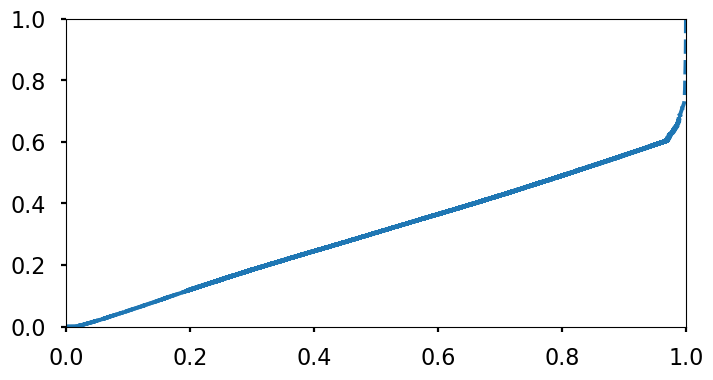

time: 2.35 s (started: 2023-09-23 16:24:39 -07:00)


In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
fig, ax = result.plot.slope(
    metric='duration', 
    view_keys=[('time_range',)], #, ('file_name',), ('proc_name',)],
    figsize=(8, 4)
)
# fig

(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x200040408ac0>)

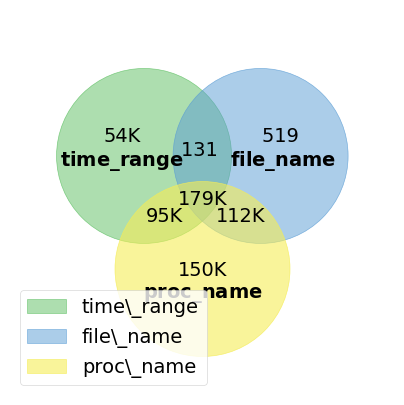

time: 6.58 s (started: 2023-09-23 16:25:25 -07:00)


In [8]:
result.plot.view_relations3('duration', ('time_range',), ('file_name',), ('proc_name',))

In [11]:
len(result.main_view.index)

829067

time: 410 ms (started: 2023-09-23 16:27:03 -07:00)
